In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слоиЫ
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/clean_data.csv', None, quiet=True)

'clean_data.csv'

In [ ]:
# Загрузка данных из файла в таблицу
df = pd.read_csv('clean_data.csv')

In [ ]:
# Вывод размерности таблицы
print(df.shape)

(10059, 3)


In [ ]:
# Вывод первых строк таблицы
df.head()

,text,category,theme
0,Здравствуйте. Подскажите пожалуйста можно ли с...,Дороги и транспорт,Запрос на льготы / субсидии
1,Подскажите пожалуйста имеют ли право не платит...,ЖКХ,Запрос юридической консультации
2,""" Спасибо Вам огромное за возобновление строит...",Строительство,Запрос юридической консультации
3,Проблема одна и общая стала в городе. Спорт. у...,Спорт,Недовольство общее
4,Некоторое время назад для школьников и студент...,Дороги и транспорт,Запрос на льготы / субсидии


In [ ]:
# Проверка, есть ли пропуски в данных
print(df.isnull().sum())

text           0
category    1797
theme       1824
dtype: int64


In [ ]:
# Есть пропуски. Замена всех пустых значений на 'нет данных'
df.fillna('нет данных', inplace=True)

In [ ]:
# Пример данных из таблицы
print(df.values[0])

['Здравствуйте. Подскажите пожалуйста можно ли сделать проезд для школьников по льготной цене. Для людей работающих в бюджетной организации, с детьми на проезд уходит значительная часть денег на оплату проезда .'
 'Дороги и транспорт' 'Запрос на льготы / субсидии']


In [ ]:
# Функция вывода сводки по распределению данных
def data_summary(df, class_labels):
    for cls in class_labels:
        print(f'Количество записей класса {cls}: {df[df.category == cls].shape[0]}')

In [ ]:
# Сводка по распределению данных
data_summary(df, df.category.unique())

Количество записей класса Дороги и транспорт: 1411
Количество записей класса ЖКХ: 2063
Количество записей класса Строительство: 349
Количество записей класса Спорт: 246
Количество записей класса Благо­­устрой­­ство: 1686
Количество записей класса Образование и наука: 290
Количество записей класса Культура: 100
Количество записей класса Демография: 20
Количество записей класса Социальная сфера: 370
Количество записей класса Другое: 208
Количество записей класса Бизнес: 187
Количество записей класса Здравоохранение: 368
Количество записей класса Органы власти: 244
Количество записей класса Экология: 180
Количество записей класса Правопорядок: 172
Количество записей класса Труд и занятость населения: 151
Количество записей класса Борьба с коррупцией: 59
Количество записей класса Промышленность: 13
Количество записей класса Сельское хозяйство: 50
Количество записей класса Земельные отношения: 80
Количество записей класса Туризм: 15
Количество записей класса нет данных: 1797


In [ ]:
# Задание параметров преобразования
VOCAB_SIZE       = 30000                  # Объем словаря для токенизатора
TRAIN_TEST_RATIO = 0.2                    # Доля проверочной выборки в основном наборе

In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df.text.tolist()
class_data = df.category.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 80591
Список классов: ['Бизнес' 'Благо\xad\xadустрой\xad\xadство' 'Борьба с коррупцией'
 'Демография' 'Дороги и транспорт' 'Другое' 'ЖКХ' 'Здравоохранение'
 'Земельные отношения' 'Культура' 'Образование и наука' 'Органы власти'
 'Правопорядок' 'Промышленность' 'Сельское хозяйство' 'Социальная сфера'
 'Спорт' 'Строительство' 'Труд и занятость населения' 'Туризм' 'Экология'
 'нет данных']
Всего классов: 22
Форма выходных данных: (10059,)
Пример числовых меток классов: [ 4  6 17 16  4  4  4  4  1  4]


In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape)
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(10059,)
[50, 1821, 113, 83, 188, 166, 506, 15, 1636, 7, 7317, 4694, 15, 176, 4438, 2, 5632, 283, 6, 289]
(10059, 30000)
[0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10059, 22)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(8047,) (2012,)
(8047, 30000) (2012, 30000)
(8047, 22) (2012, 22)


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     3,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         2,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,022,522 (11.53 MB)

 Trainable params: 3,022,522 (11.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2393 - loss: 2.4775 - val_accuracy: 0.4518 - val_loss: 1.7719
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5012 - loss: 1.6200 - val_accuracy: 0.5070 - val_loss: 1.6345
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6364 - loss: 1.2030 - val_accuracy: 0.5363 - val_loss: 1.6380
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7230 - loss: 0.9368 - val_accuracy: 0.5417 - val_loss: 1.7897
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7832 - loss: 0.7375 - val_accuracy: 0.5512 - val_loss: 1.8536
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8226 - loss: 0.6353 - val_accuracy: 0.5487 - val_loss: 1.8900
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8434 - loss: 0.5466 - val_accuracy: 0.5477 - val_loss: 2.0848
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8670 - loss: 0.4764 - val_accuracy: 0

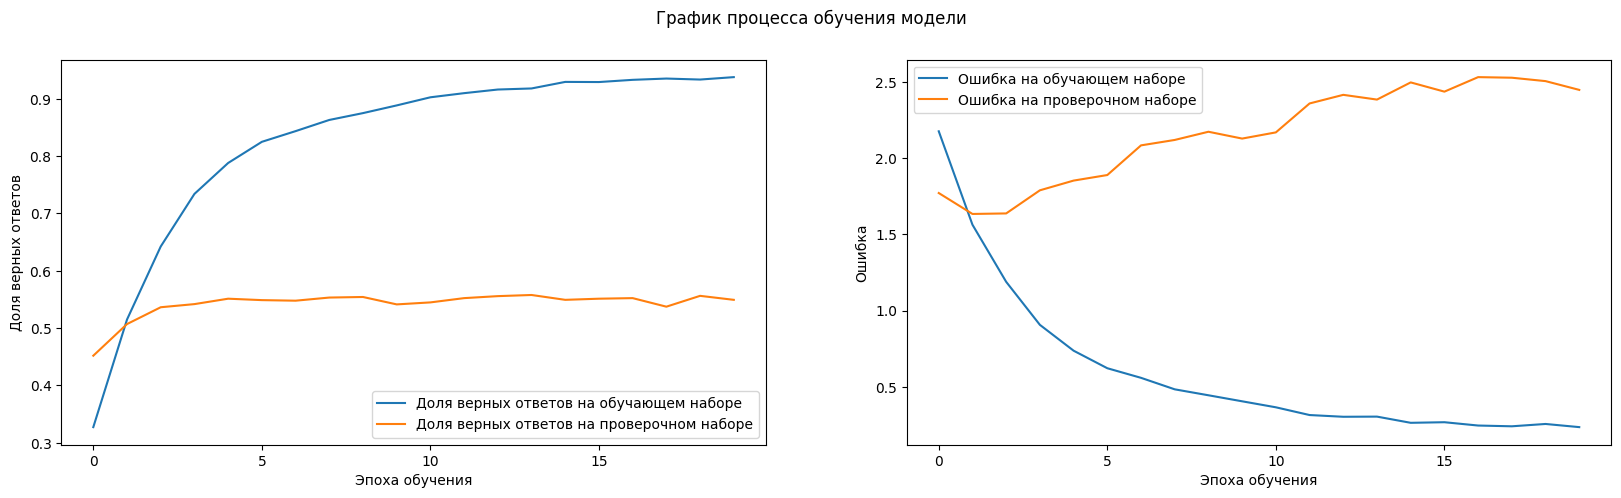

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


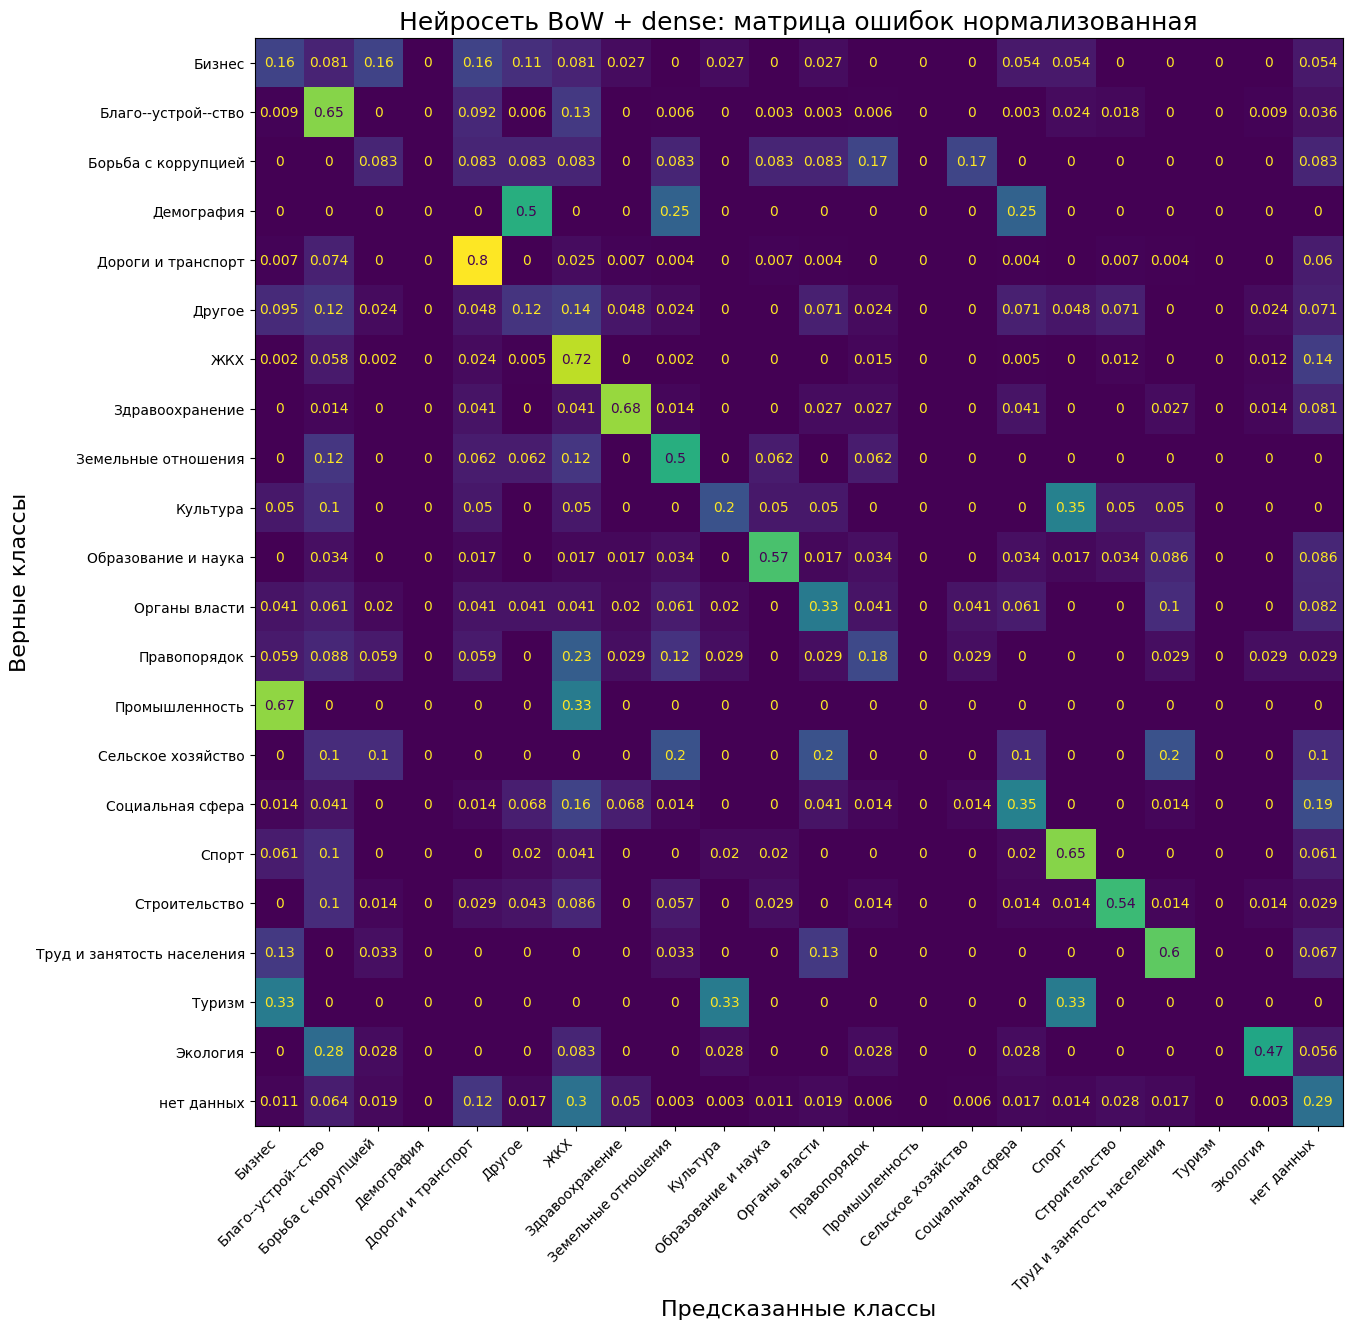

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense
Класс: Бизнес                16% сеть отнесла к классу Бизнес               - ВЕРНО :-)
Класс: Благо­­устрой­­ство   65% сеть отнесла к классу Благо­­устрой­­ство  - ВЕРНО :-)
Класс: Борьба с коррупцией   17% сеть отнесла к классу Правопорядок         - НЕВЕРНО :-(
Класс: Демография            50% сеть отнесла к классу Другое               - НЕВЕРНО :-(
Класс: Дороги и транспорт    80% сеть отнесла к классу Дороги и транспорт   - ВЕРНО :-)
Класс: Другое                14% сеть отнесла к классу ЖКХ                  - НЕВЕРНО :-(
Класс: ЖКХ                   72% сеть отнесла к классу ЖКХ                  - ВЕРНО :-)
Класс: Здравоохранение       68% сеть отнесла к классу Здравоохранение      - ВЕРНО :-)
Класс: Земельные отношения   50% сеть отнесла к классу Земельные отношения  - ВЕРНО :-)
Класс: Культура              35% сеть отнесла к классу Спорт                - 

In [ ]:
# Последовательная модель
model_text_bow_dense = Sequential()
# Входной полносвязный слой
model_text_bow_dense.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Второй полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Третий полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Выходной полносвязный слой
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense')

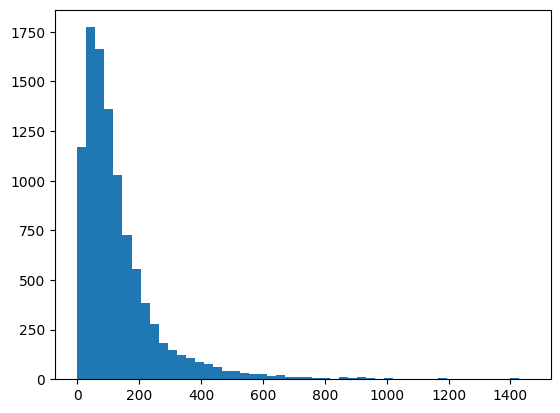

In [ ]:
# Построение гистограммы распределения длин текстов основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
# Снижение размерности входных данных:
# ограничение длины последовательностей до разумного предела
seq_max_len = 400
x_train_clip = pad_sequences(x_train, maxlen=seq_max_len)
x_test_clip = pad_sequences(x_test, maxlen=seq_max_len)

# Проверка формы результата
print(x_train_clip.shape, x_test_clip.shape)

(8047, 400) (2012, 400)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.1331 - loss: 3.2644 - val_accuracy: 0.2127 - val_loss: 2.4711
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4991 - loss: 1.7274 - val_accuracy: 0.3618 - val_loss: 2.0527
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8353 - loss: 0.6623 - val_accuracy: 0.4090 - val_loss: 1.9815
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9437 - loss: 0.2821 - val_accuracy: 0.4006 - val_loss: 2.0372
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9785 - loss: 0.1348 - val_accuracy: 0.3917 - val_loss: 2.1934
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.1007 - val_accuracy: 0.4031 - val_loss: 2.1834
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0819 - val_accuracy: 0.4125 - val_loss: 2.3445
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0599 - val_accuracy: 

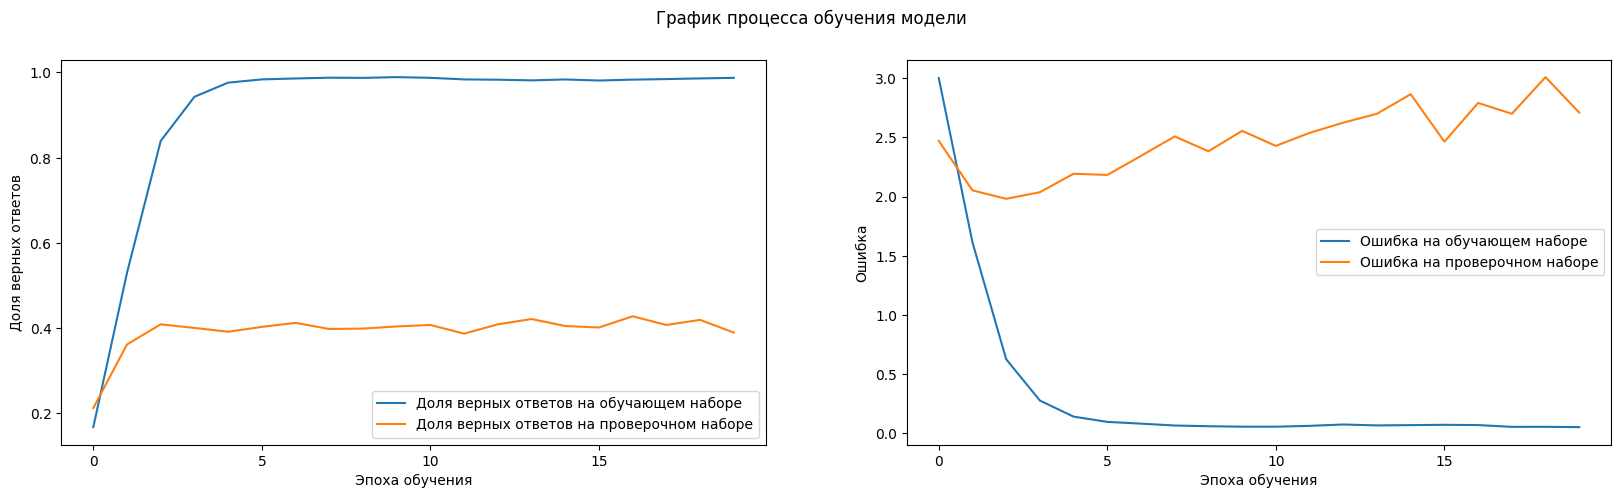

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


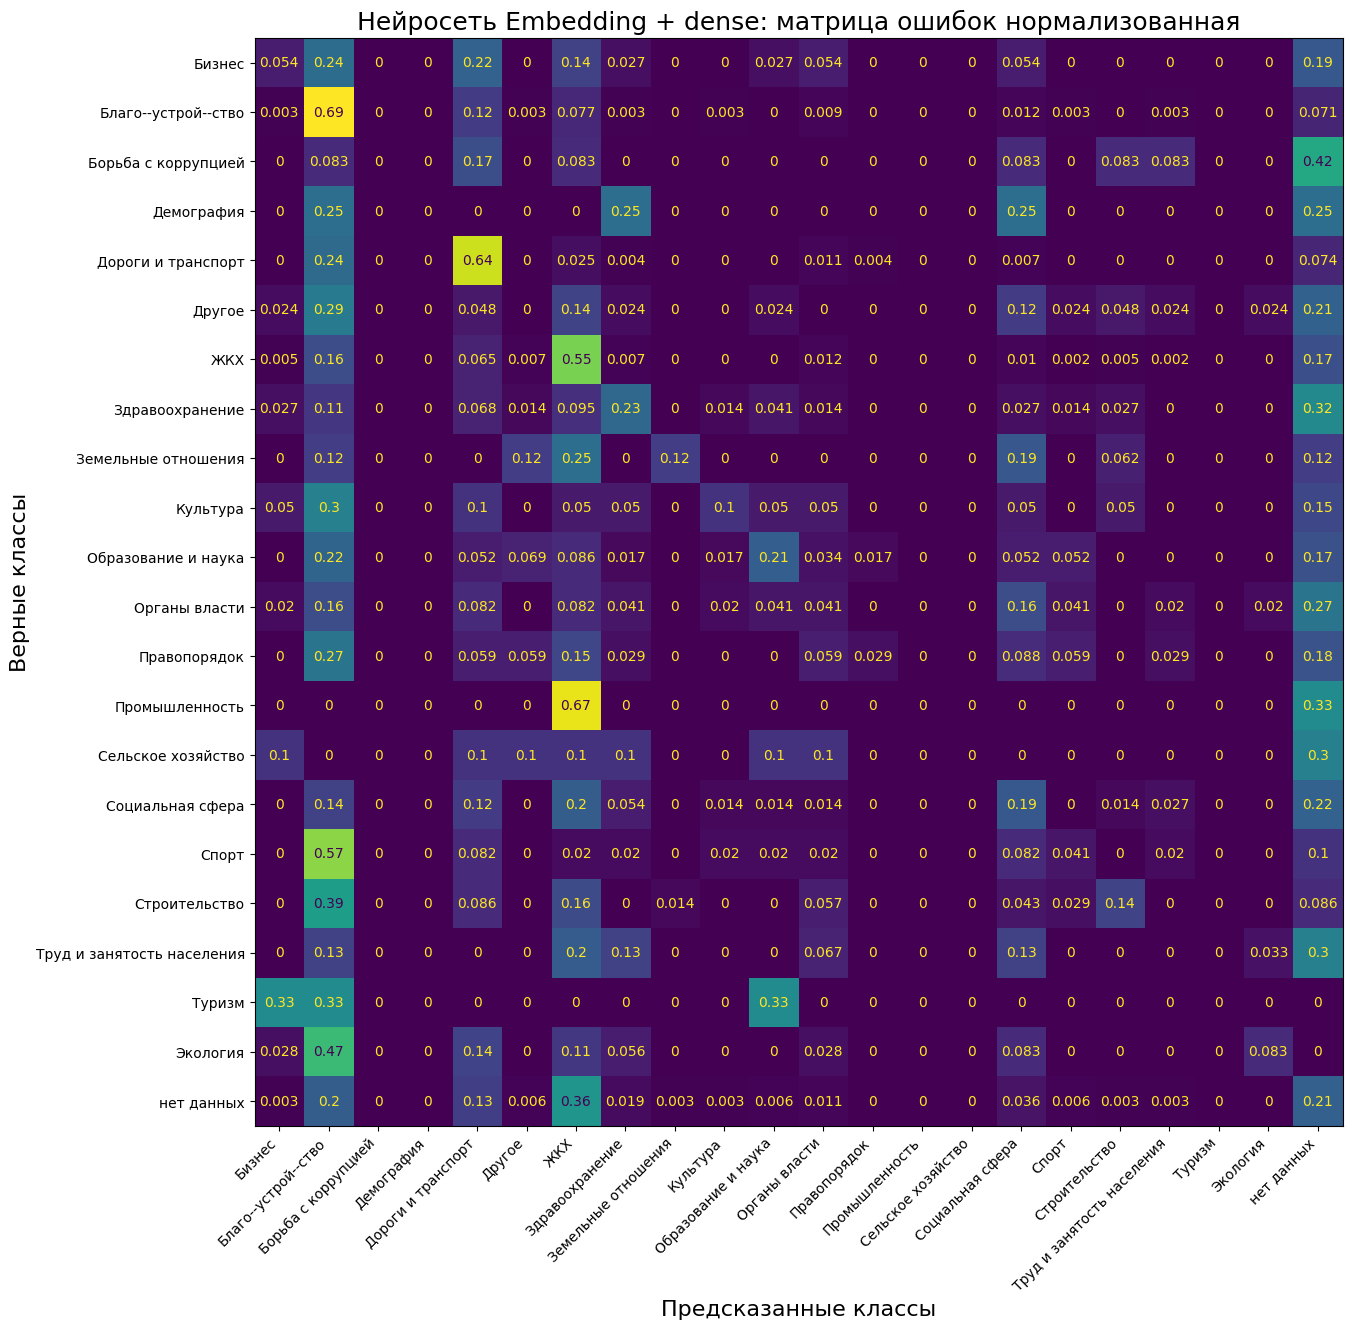

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding + dense
Класс: Бизнес                24% сеть отнесла к классу Благо­­устрой­­ство  - НЕВЕРНО :-(
Класс: Благо­­устрой­­ство   69% сеть отнесла к классу Благо­­устрой­­ство  - ВЕРНО :-)
Класс: Борьба с коррупцией   42% сеть отнесла к классу нет данных           - НЕВЕРНО :-(
Класс: Демография            25% сеть отнесла к классу Благо­­устрой­­ство  - НЕВЕРНО :-(
Класс: Дороги и транспорт    64% сеть отнесла к классу Дороги и транспорт   - ВЕРНО :-)
Класс: Другое                29% сеть отнесла к классу Благо­­устрой­­ство  - НЕВЕРНО :-(
Класс: ЖКХ                   55% сеть отнесла к классу ЖКХ                  - ВЕРНО :-)
Класс: Здравоохранение       32% сеть отнесла к классу нет данных           - НЕВЕРНО :-(
Класс: Земельные отношения   25% сеть отнесла к классу ЖКХ                  - НЕВЕРНО :-(
Класс: Культура              30% сеть отнесла к классу Благо­­устр

In [ ]:
# Последовательная модель
model_text_emb_dense = Sequential()
# Cлой эмбеддингов
model_text_emb_dense.add(Embedding(VOCAB_SIZE, 50, input_length=seq_max_len))
# Слой регуляризации Dropout
model_text_emb_dense.add(SpatialDropout1D(0.2))
# Cлой преобразования многомерных данных в одномерные
model_text_emb_dense.add(Flatten())
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Полносвязный слой
model_text_emb_dense.add(Dense(64, activation="relu"))
# Слой регуляризации Dropout
model_text_emb_dense.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Выходной полносвязный слой
model_text_emb_dense.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_dense,
                         x_train_clip, y_train,
                         x_test_clip, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='Embedding + dense')

In [ ]:
# Сводка по распределению данных в порядке кодированных меток
data_summary(df, CLASS_LIST)

Количество записей класса Бизнес: 187
Количество записей класса Благо­­устрой­­ство: 1686
Количество записей класса Борьба с коррупцией: 59
Количество записей класса Демография: 20
Количество записей класса Дороги и транспорт: 1411
Количество записей класса Другое: 208
Количество записей класса ЖКХ: 2063
Количество записей класса Здравоохранение: 368
Количество записей класса Земельные отношения: 80
Количество записей класса Культура: 100
Количество записей класса Образование и наука: 290
Количество записей класса Органы власти: 244
Количество записей класса Правопорядок: 172
Количество записей класса Промышленность: 13
Количество записей класса Сельское хозяйство: 50
Количество записей класса Социальная сфера: 370
Количество записей класса Спорт: 246
Количество записей класса Строительство: 349
Количество записей класса Труд и занятость населения: 151
Количество записей класса Туризм: 15
Количество записей класса Экология: 180
Количество записей класса нет данных: 1797


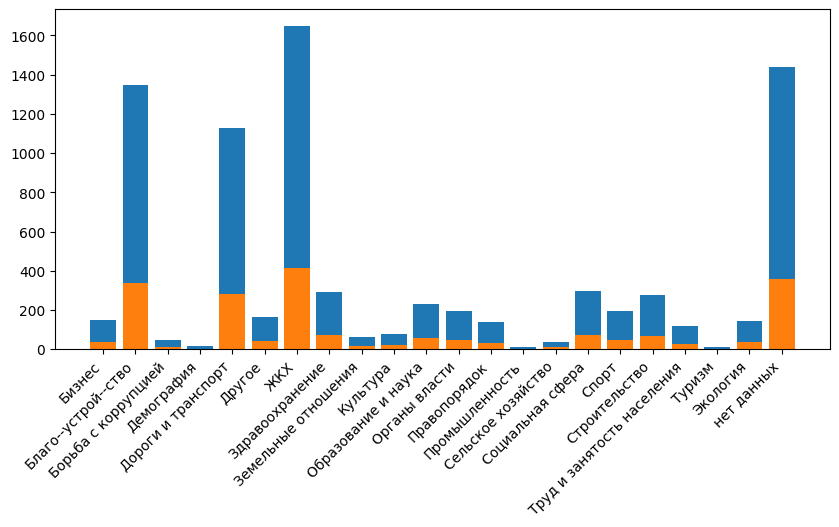

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# Назначение интервала допустимого количества текстов по классу
text_count_interval = [200, 400]

# Фильтрация данных - отбрасываются все данные без категории
# и все классы объемом менее нижней границы разрешенного интервала
class_to_drop = ['нет данных']
for cls in df.category.unique():
    if df[df.category == cls].shape[0] < text_count_interval[0]:
        class_to_drop.append(cls)

print(f'Удаляются классы: {class_to_drop}')

del_mask = df.category.isin(class_to_drop)
df = df[~del_mask]

# По всем оставшимся классам количество примеров ограничивается не более
# верхней границы разрешенного интервала
for cls in df.category.unique():
    df = df.drop(df[df.category == cls].index[text_count_interval[1]:])

Удаляются классы: ['нет данных', 'Культура', 'Демография', 'Бизнес', 'Экология', 'Правопорядок', 'Труд и занятость населения', 'Борьба с коррупцией', 'Промышленность', 'Сельское хозяйство', 'Земельные отношения', 'Туризм']


In [ ]:
data_summary(df, df.category.unique())

Количество записей класса Дороги и транспорт: 400
Количество записей класса ЖКХ: 400
Количество записей класса Строительство: 349
Количество записей класса Спорт: 246
Количество записей класса Благо­­устрой­­ство: 400
Количество записей класса Образование и наука: 290
Количество записей класса Социальная сфера: 370
Количество записей класса Другое: 208
Количество записей класса Здравоохранение: 368
Количество записей класса Органы власти: 244


In [ ]:
# Извелечение всех записей-текстов обращений и их меток классов
text_data = df.text.tolist()
class_data = df.category.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 47299
Список классов: ['Благо\xad\xadустрой\xad\xadство' 'Дороги и транспорт' 'Другое' 'ЖКХ'
 'Здравоохранение' 'Образование и наука' 'Органы власти'
 'Социальная сфера' 'Спорт' 'Строительство']
Всего классов: 10
Форма выходных данных: (3275,)
Пример числовых меток классов: [1 3 9 8 1 1 1 1 0 1]


In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape)
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(3275,)
[59, 1911, 115, 82, 168, 166, 414, 15, 1034, 7, 4170, 6926, 15, 161, 4816, 2, 3297, 281, 6, 261]
(3275, 30000)
[0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(3275, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(2620,) (655,)
(2620, 30000) (655, 30000)
(2620, 10) (655, 10)


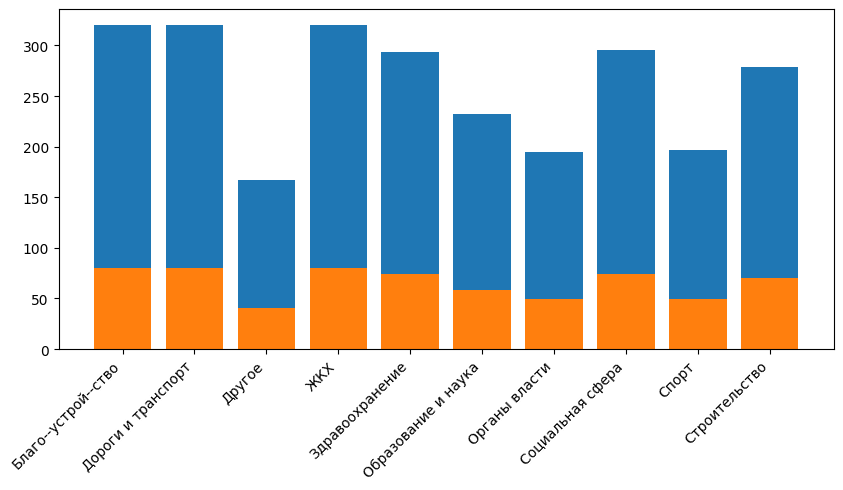

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │     3,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,021,310 (11.53 MB)

 Trainable params: 3,021,310 (11.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1354 - loss: 2.2714 - val_accuracy: 0.5573 - val_loss: 1.8723
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4232 - loss: 1.7439 - val_accuracy: 0.6779 - val_loss: 1.2189
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6481 - loss: 1.1192 - val_accuracy: 0.7023 - val_loss: 1.0468
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7733 - loss: 0.7566 - val_accuracy: 0.7206 - val_loss: 0.9544
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8564 - loss: 0.4671 - val_accuracy: 0.7176 - val_loss: 1.0106
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8971 - loss: 0.3512 - val_accuracy: 0.7053 - val_loss: 1.0611
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9362 - loss: 0.2462 - val_accuracy: 0.7237 - val_loss: 1.0727
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9540 - loss: 0.1843 - val_accuracy: 0.7099 - val_loss

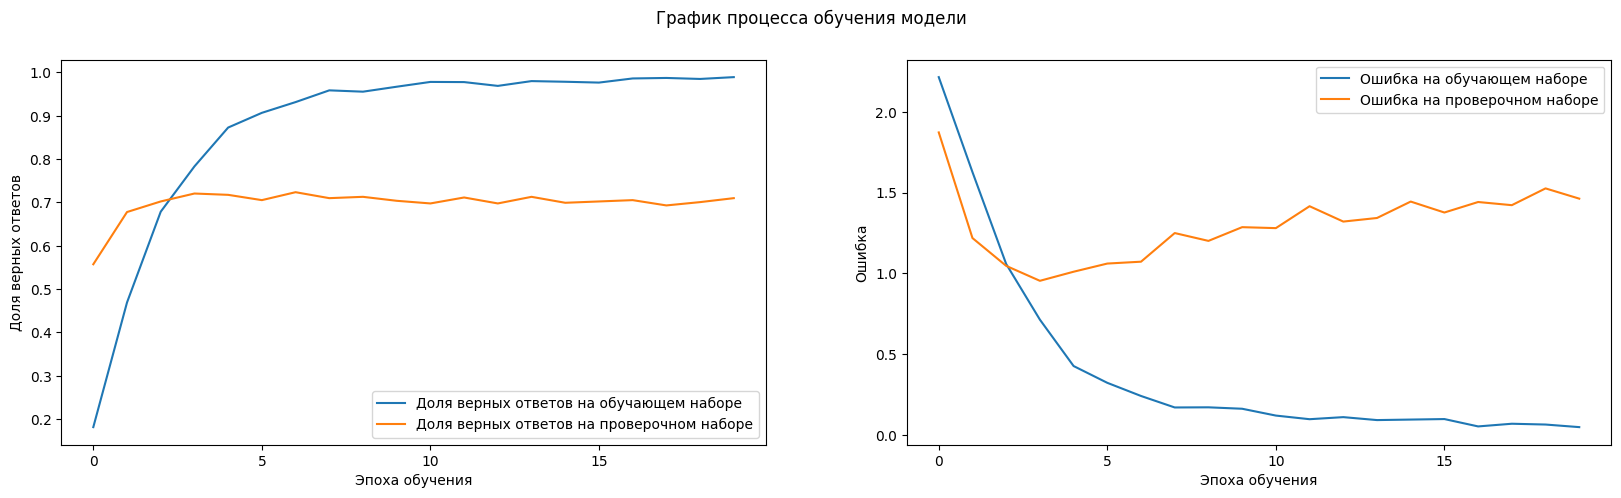

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


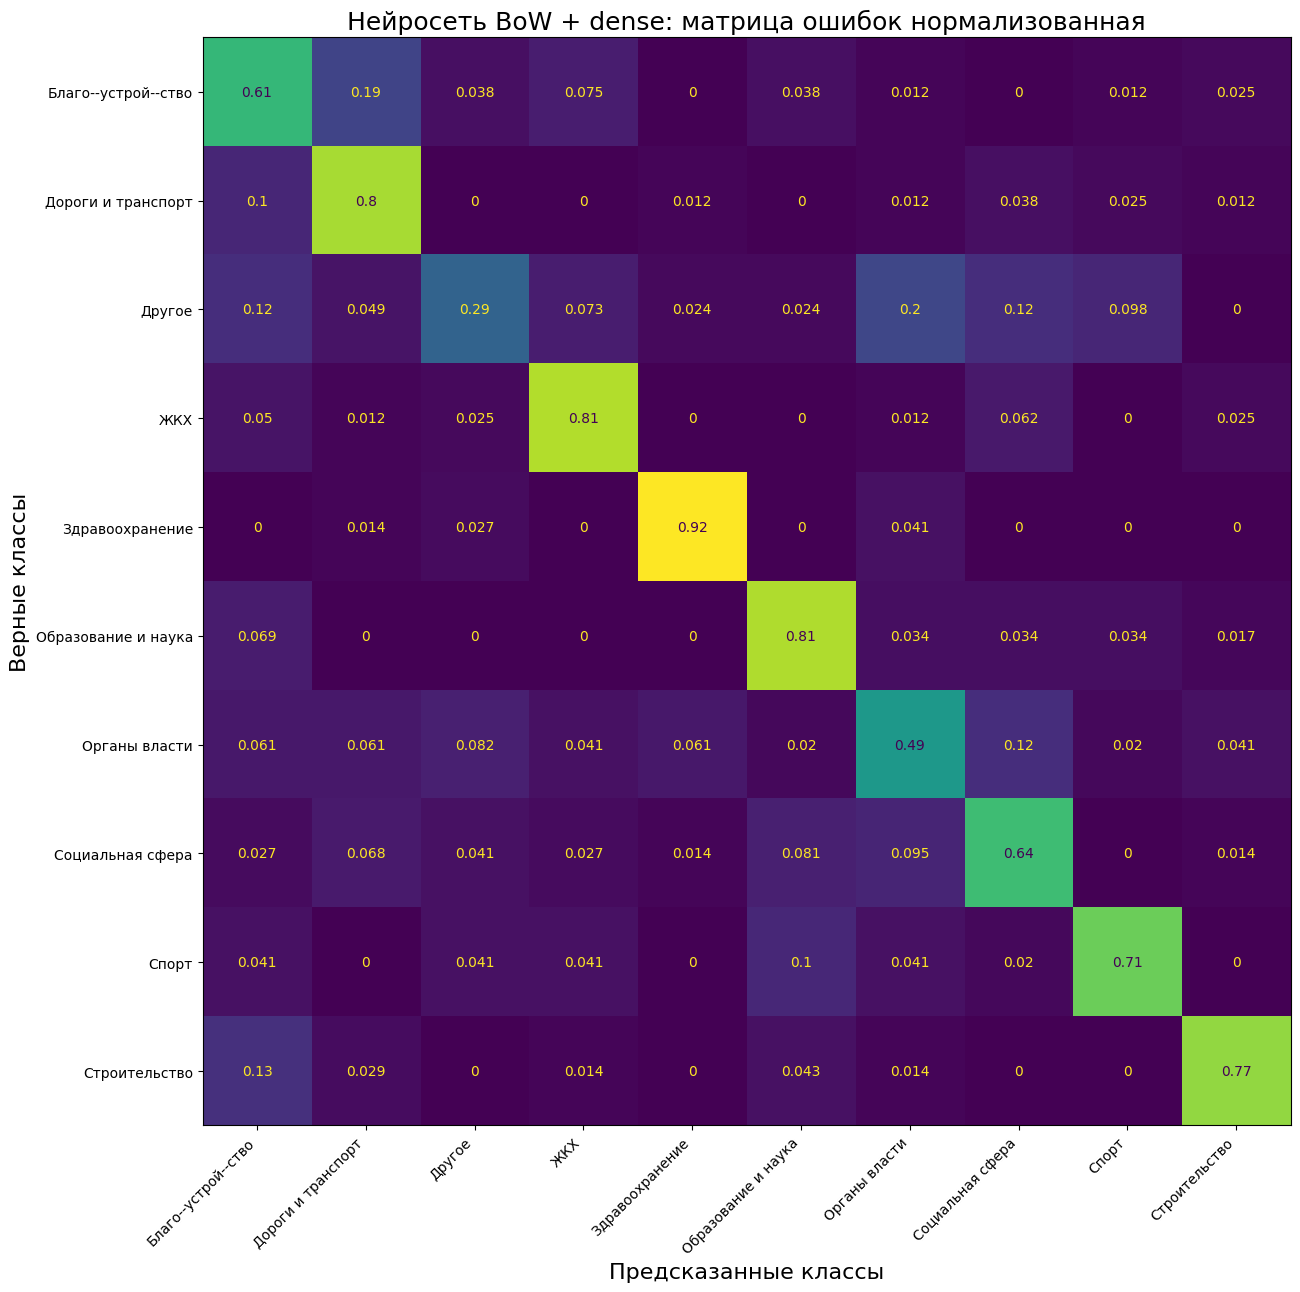

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense
Класс: Благо­­устрой­­ство   61% сеть отнесла к классу Благо­­устрой­­ство  - ВЕРНО :-)
Класс: Дороги и транспорт    80% сеть отнесла к классу Дороги и транспорт   - ВЕРНО :-)
Класс: Другое                29% сеть отнесла к классу Другое               - ВЕРНО :-)
Класс: ЖКХ                   81% сеть отнесла к классу ЖКХ                  - ВЕРНО :-)
Класс: Здравоохранение       92% сеть отнесла к классу Здравоохранение      - ВЕРНО :-)
Класс: Образование и наука   81% сеть отнесла к классу Образование и наука  - ВЕРНО :-)
Класс: Органы власти         49% сеть отнесла к классу Органы власти        - ВЕРНО :-)
Класс: Социальная сфера      64% сеть отнесла к классу Социальная сфера     - ВЕРНО :-)
Класс: Спорт                 71% сеть отнесла к классу Спорт                - ВЕРНО :-)
Класс: Строительство         77% сеть отнесла к классу Строительство        - ВЕРНО 

In [ ]:
# Последовательная модель
model_text_bow_dense = Sequential()
# Входной полносвязный слой
model_text_bow_dense.add(Dense(100, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Второй полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Третий полносвязный слой
model_text_bow_dense.add(Dense(100, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.4))
# Выходной полносвязный слой
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense')

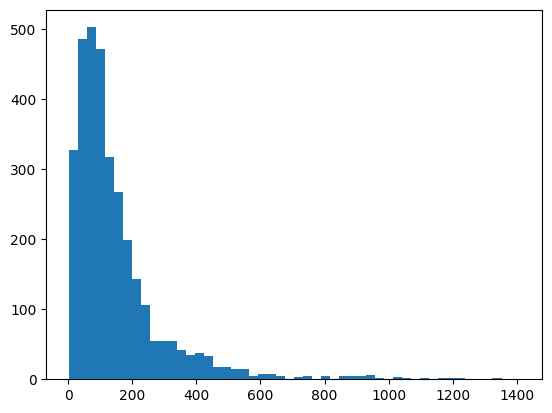

In [ ]:
# Построение гистограммы распределения длин текстов в словах основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 50)
plt.show()

In [ ]:
# Снижение размерности входных данных:
# ограничение длины последовательностей до разумного предела
seq_max_len = 400
x_train_clip = pad_sequences(x_train, maxlen=seq_max_len)
x_test_clip = pad_sequences(x_test, maxlen=seq_max_len)

# Проверка формы результата
print(x_train_clip.shape, x_test_clip.shape)

(2620, 400) (655, 400)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0978 - loss: 2.9168 - val_accuracy: 0.1130 - val_loss: 2.3243
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3095 - loss: 1.9987 - val_accuracy: 0.1130 - val_loss: 2.3326
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7969 - loss: 0.7935 - val_accuracy: 0.1206 - val_loss: 2.2832
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9442 - loss: 0.3197 - val_accuracy: 0.1878 - val_loss: 2.1964
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9854 - loss: 0.1555 - val_accuracy: 0.2519 - val_loss: 2.1283
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9928 - loss: 0.0963 - val_accuracy: 0.2840 - val_loss: 2.0476
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.0578 - val_accuracy: 0.2794 - val_loss: 2.0312
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9975 - loss: 0.0419 - val_accuracy: 0.3130 - val_loss

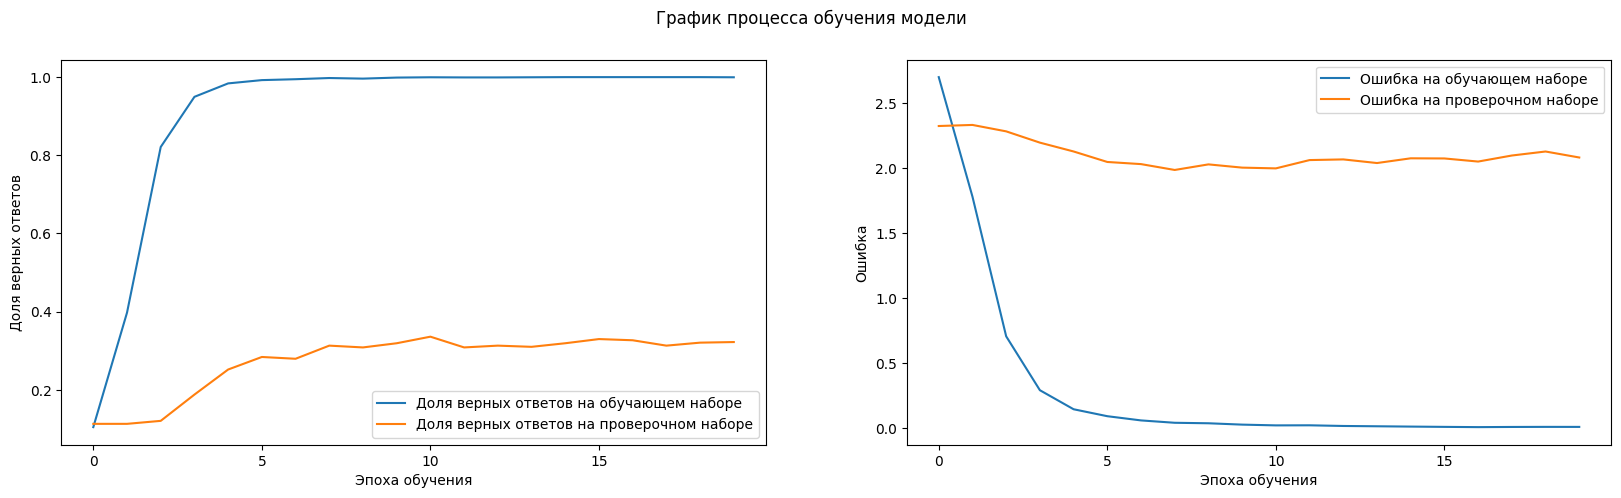

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


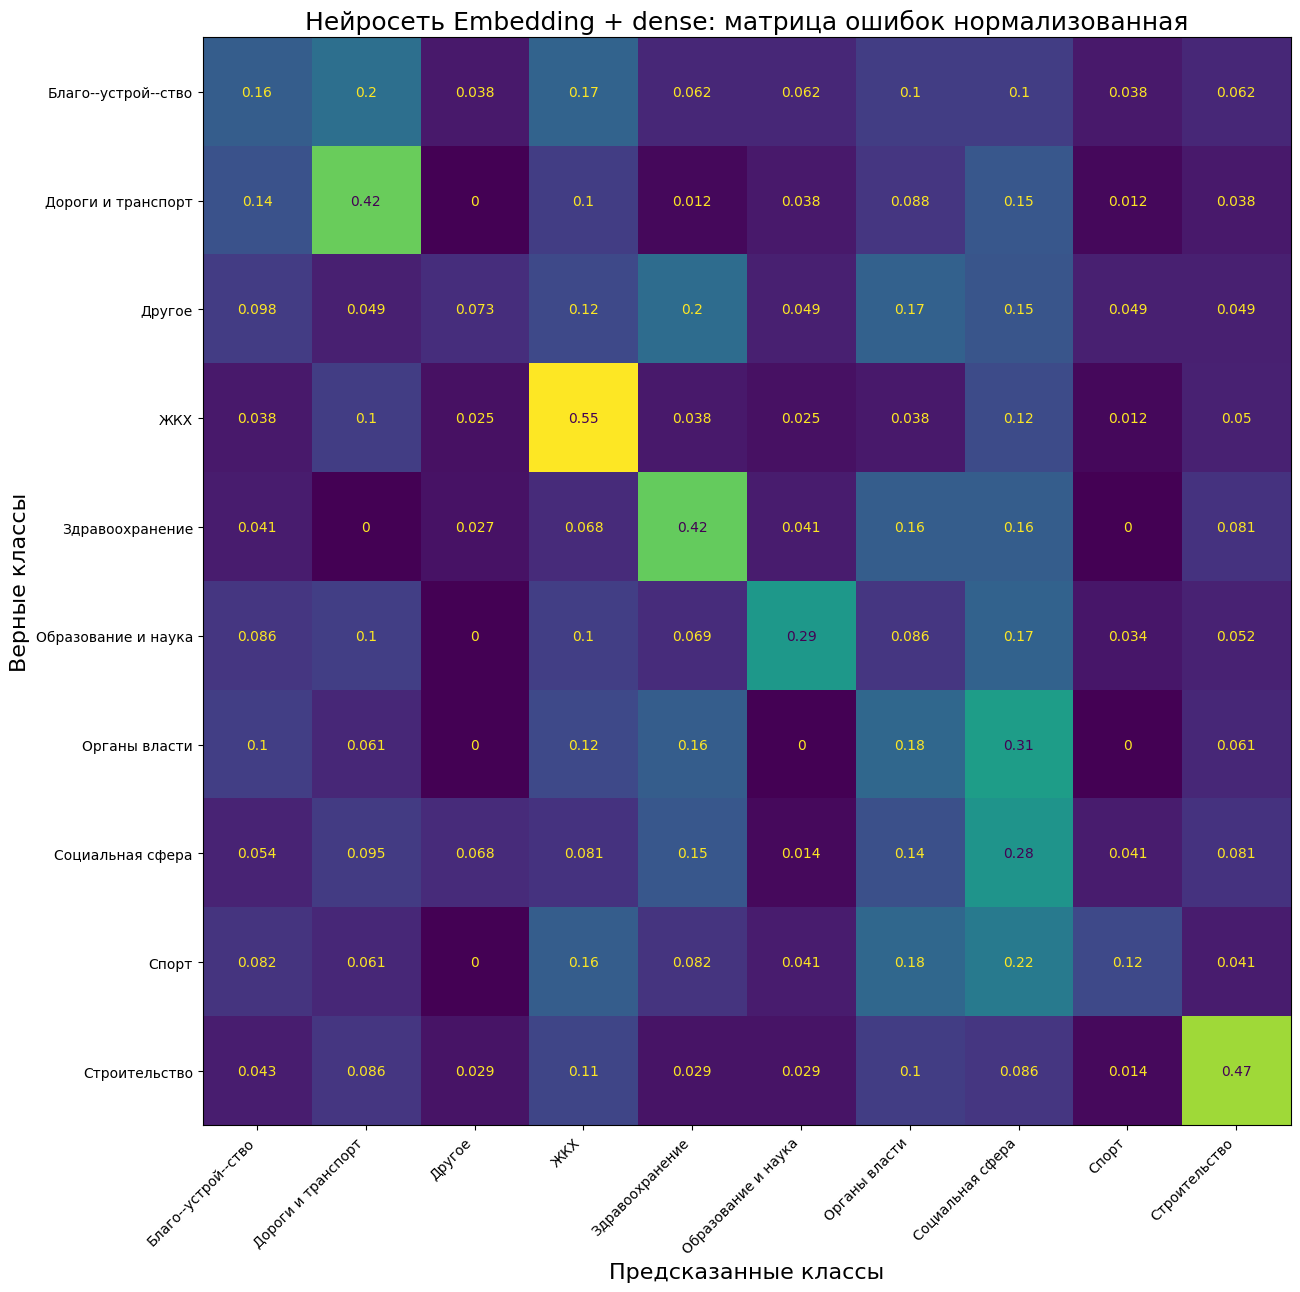

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding + dense
Класс: Благо­­устрой­­ство   20% сеть отнесла к классу Дороги и транспорт   - НЕВЕРНО :-(
Класс: Дороги и транспорт    42% сеть отнесла к классу Дороги и транспорт   - ВЕРНО :-)
Класс: Другое                20% сеть отнесла к классу Здравоохранение      - НЕВЕРНО :-(
Класс: ЖКХ                   55% сеть отнесла к классу ЖКХ                  - ВЕРНО :-)
Класс: Здравоохранение       42% сеть отнесла к классу Здравоохранение      - ВЕРНО :-)
Класс: Образование и наука   29% сеть отнесла к классу Образование и наука  - ВЕРНО :-)
Класс: Органы власти         31% сеть отнесла к классу Социальная сфера     - НЕВЕРНО :-(
Класс: Социальная сфера      28% сеть отнесла к классу Социальная сфера     - ВЕРНО :-)
Класс: Спорт                 22% сеть отнесла к классу Социальная сфера     - НЕВЕРНО :-(
Класс: Строительство         47% сеть отнесла к классу Строительство  

In [ ]:
# Последовательная модель
model_text_emb_dense = Sequential()
# Cлой эмбеддингов
model_text_emb_dense.add(Embedding(VOCAB_SIZE, 50, input_length=seq_max_len))
# Слой регуляризации Dropout
model_text_emb_dense.add(SpatialDropout1D(0.2))
# Cлой преобразования многомерных данных в одномерные
model_text_emb_dense.add(Flatten())
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Полносвязный слой
model_text_emb_dense.add(Dense(64, activation="relu"))
# Слой регуляризации Dropout
model_text_emb_dense.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Выходной полносвязный слой
model_text_emb_dense.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_dense,
                         x_train_clip, y_train,
                         x_test_clip, y_test,
                         epochs=20,
                         batch_size=32,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='Embedding + dense')